In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
path_test = "/kaggle/input/titanic/test.csv"
path_train = "/kaggle/input/titanic/train.csv"

df_test = pd.read_csv(path_test, index_col='PassengerId')
df_train = pd.read_csv(path_train, index_col='PassengerId')

In [3]:
df_test.head()
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test['Survived'] = -888
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-888
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-888
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-888
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-888
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-888


In [5]:
df = pd.concat((df_train, df_test), axis=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 843


In [7]:
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in first class : {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class : 179


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [12]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [13]:
df.Embarked.fillna('C', inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [15]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
median_Fare = df.loc[(df.Pclass==3) & (df.Embarked=='S'), 'Fare'].median()
print(median_Fare)

8.05


In [17]:
df.Fare.fillna(median_Fare, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

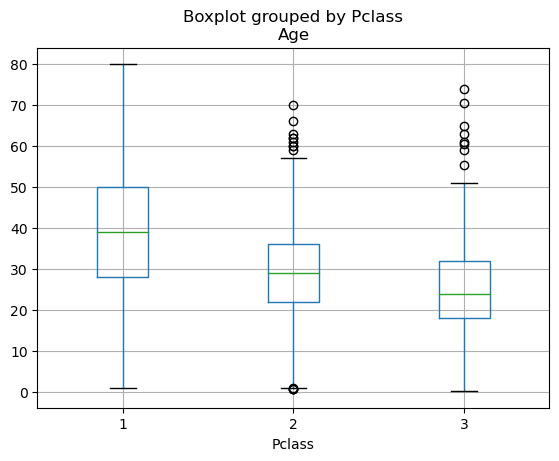

In [19]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [20]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [21]:
# function to extract the title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [22]:
df.Name.map(lambda x : GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [23]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [24]:
def GetTitle(name):
    title_group = {'mr' : 'Mr',
                  'mrs' : 'Mrs',
                  'miss' : 'Miss', 
                  'master' : 'Master',
                  'don' : 'Sir',
                  'rev' : 'Sir', 
                  'dr' : 'Officer',
                  'mme' : 'Mrs',
                  'ms' : 'Mrs',
                  'major' : 'Officer', 
                  'lady' : 'Lady', 
                  'sir' : 'Sir',
                  'mlle' : 'Miss',
                  'col' : 'Officer',
                  'capt' : 'Officer',
                  'the countess' : 'Lady',
                  'jonkheer' : 'Sir',
                  'dona' : 'Lady'
                  }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [25]:
df['Title'] = df.Name.map(lambda x : GetTitle(x))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<AxesSubplot:title={'center':'Age'}, xlabel='Title'>

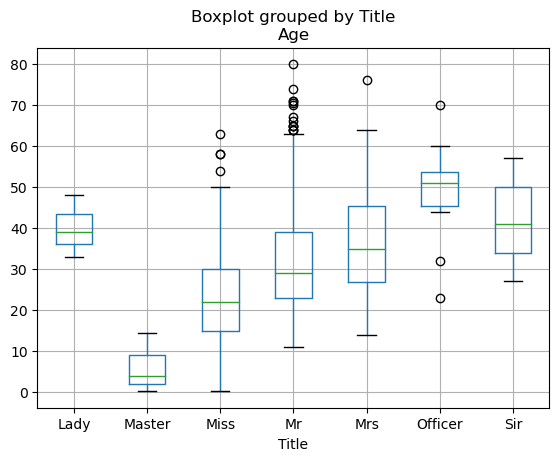

In [26]:
df[df.Age.notnull()].boxplot('Age','Title')

In [27]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


<AxesSubplot:>

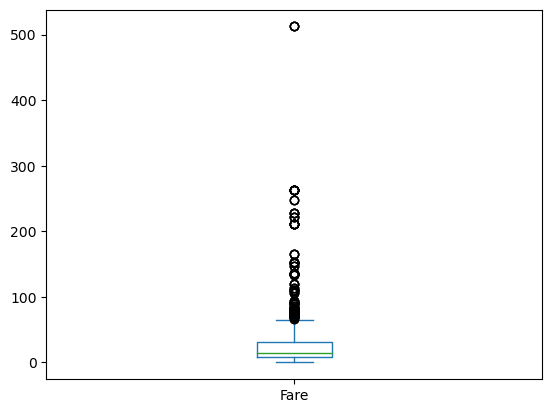

In [28]:
df.Fare.plot(kind='box')

In [29]:
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [30]:
# Using transformation to reduce skewness
Logfare = np.log(df.Fare + 1.0)

<AxesSubplot:ylabel='Frequency'>

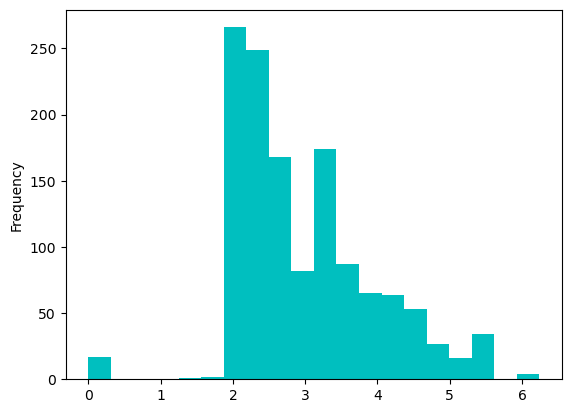

In [31]:
Logfare.plot(kind='hist', bins=20, color='c')

In [32]:
# Binning
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['very_low' < 'low' < 'high' < 'very_high']

<AxesSubplot:>

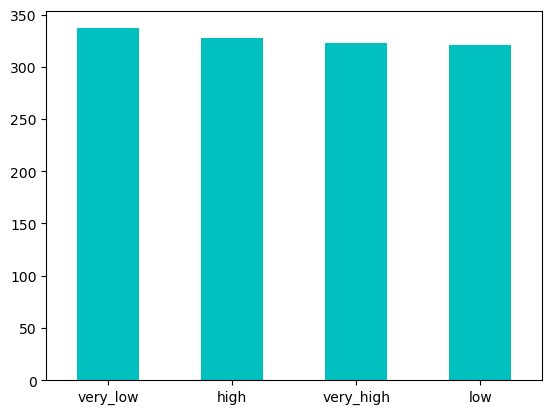

In [33]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',color='c', rot=0)

In [34]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low


In [35]:
df['AgeState'] = np.where(df['Age']>=18, 'Adult', 'Child')

In [36]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [37]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [38]:
# Feature: family size
df['FamilySize'] = df.Parch + df.SibSp + 1

<AxesSubplot:ylabel='Frequency'>

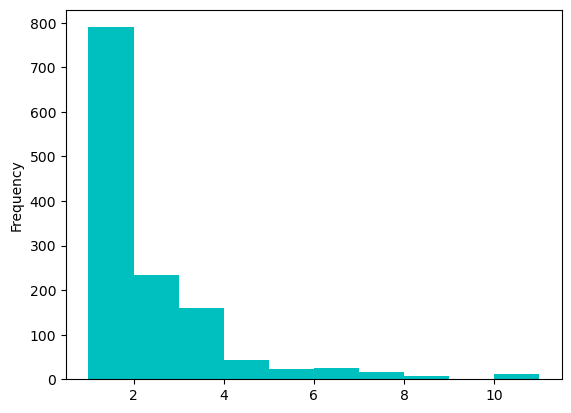

In [39]:
df['FamilySize'].plot(kind='hist', color='c')

In [40]:
df.loc[df.FamilySize == df.FamilySize.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,Master,very_high,Child,11
181,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
202,0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
325,0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
793,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1080,-888,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1234,-888,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11


In [41]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [42]:
# Feature: IsMother
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch>0) & (df.Age>18) & (df.Title!='Miss')), 1, 0)

In [43]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [44]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [46]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [47]:
def GetDeck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : GetDeck(x))

In [48]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [49]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_Bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int64   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 175.3+ KB


In [51]:
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [52]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother,Deck,IsMale
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low,Adult,2,0,Z,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high,Adult,2,0,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low,Adult,1,0,Z,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high,Adult,2,0,C,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low,Adult,1,0,Z,1


In [53]:
#one hot encoding
df = pd.get_dummies(df, columns = ['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int64  
 11  IsMale              1309 non-null   int64  
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

In [54]:
#drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [55]:
# Reorder columns
columns = [column for column in df.columns if column!='Survived']
columns = ['Survived']+columns
df = df[columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int64  
 5   IsMale              1309 non-null   int64  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_Z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

In [57]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [58]:
import os

processed_data_path = "/kaggle/working/data/processed"
os.makedirs(processed_data_path, exist_ok=True)

# Save the processed train dataset
train_df = df.loc[df.Survived != -888]
train_path = os.path.join(processed_data_path, "train.csv")
train_df.to_csv(train_path)

# Save the processed test dataset
test_df = df.loc[df.Survived == -888]
test_path = os.path.join(processed_data_path, "test.csv")
test_df.drop("Survived", axis=1).to_csv(test_path)

In [59]:
import pandas as pd

# Read the train dataset
train_path = "/kaggle/working/data/processed/train.csv"
train_df = pd.read_csv(train_path, index_col='PassengerId')

# Read the test dataset
test_path = "/kaggle/working/data/processed/test.csv"
test_df = pd.read_csv(test_path, index_col='PassengerId')

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Fare                891 non-null    float64
 3   FamilySize          891 non-null    int64  
 4   IsMother            891 non-null    int64  
 5   IsMale              891 non-null    int64  
 6   Deck_A              891 non-null    int64  
 7   Deck_B              891 non-null    int64  
 8   Deck_C              891 non-null    int64  
 9   Deck_D              891 non-null    int64  
 10  Deck_E              891 non-null    int64  
 11  Deck_F              891 non-null    int64  
 12  Deck_G              891 non-null    int64  
 13  Deck_Z              891 non-null    int64  
 14  Pclass_1            891 non-null    int64  
 15  Pclass_2            891 non-null    int64  
 16  Pclass_3

In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 418 non-null    float64
 1   Fare                418 non-null    float64
 2   FamilySize          418 non-null    int64  
 3   IsMother            418 non-null    int64  
 4   IsMale              418 non-null    int64  
 5   Deck_A              418 non-null    int64  
 6   Deck_B              418 non-null    int64  
 7   Deck_C              418 non-null    int64  
 8   Deck_D              418 non-null    int64  
 9   Deck_E              418 non-null    int64  
 10  Deck_F              418 non-null    int64  
 11  Deck_G              418 non-null    int64  
 12  Deck_Z              418 non-null    int64  
 13  Pclass_1            418 non-null    int64  
 14  Pclass_2            418 non-null    int64  
 15  Pclass_3            418 non-null    int64  
 16  Title

In [62]:
import pandas as pd
import os
import numpy as np

X = train_df.loc[:,'Age':].to_numpy().astype('float')
y = train_df['Survived'].ravel()

In [63]:
print(X.shape, y.shape)

(891, 32) (891,)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 32) (712,)
(179, 32) (179,)


In [65]:
print('mean survival in train : {0:.3f}'.format(np.mean(y_train)))
print('mean survival in test : {0:.3f}'.format(np.mean(y_test)))


mean survival in train : 0.383
mean survival in test : 0.385


In [66]:
 import sklearn

In [67]:
from sklearn.dummy import DummyClassifier

In [68]:
model_dummy = DummyClassifier(strategy='most_frequent',random_state=0)

In [69]:
model_dummy.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [70]:
print('score for baseline model : {0:.2f}'.format(model_dummy.score(X_test, y_test)))

score for baseline model : 0.61


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_dummy.predict(X_test))))

accuracy for baseline model : 0.61


In [72]:
print('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_dummy.predict(X_test))))

confusion matrix for baseline model: 
 [[110   0]
 [ 69   0]]


In [73]:
print('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_dummy.predict(X_test))))
print('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_dummy.predict(X_test))))

precision for baseline model : 0.00
recall for baseline model : 0.00


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
test_X = test_df.to_numpy().astype('float')

In [75]:
predictions = model_dummy.predict(test_X)

In [76]:
df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions})

In [77]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [78]:
import os

processed_data_path = "/kaggle/working/data/external"
os.makedirs(processed_data_path, exist_ok=True)

In [79]:
submission_path = os.path.join(processed_data_path, "submission.csv")
df_submission.to_csv(submission_path, index=False)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model_lr_1 = LogisticRegression(random_state=0)

In [82]:
model_lr_1.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [83]:
print('Score for logistic regression - version 1 : {0:.2f}'.format(model_lr_1.score(X_test, y_test)))

Score for logistic regression - version 1 : 0.83


In [84]:
print('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(y_test, model_lr_1.predict(X_test))))
print('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(y_test, model_lr_1.predict(X_test))))
print('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(y_test, model_lr_1.predict(X_test))))
print('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(y_test, model_lr_1.predict(X_test))))

accuracy for logistic regression - version 1 : 0.83
confusion matrix for logistic regression - version 1: 
 [[95 15]
 [15 54]]
precision for logistic regression - version 1 : 0.78
recall for logistic regression - version 1 : 0.78


In [85]:
model_lr_1.coef_

array([[-0.02957733,  0.00414554, -0.48810279,  0.55879455, -0.76107308,
         0.12134015, -0.0741763 , -0.35965092,  0.47362003,  1.01795535,
         0.2648092 , -0.04875954, -0.36234008,  0.90663563,  0.49165752,
        -0.36549527,  0.10805492,  1.0387368 ,  0.52131952, -1.49059191,
         1.16449652, -0.10040372, -0.20881425,  0.11931311,  0.22344356,
         0.26961452,  0.4204267 ,  0.44318062,  0.47305791,  0.11655936,
         0.33831947,  0.69447842]])

In [86]:
test_X = test_df.to_numpy().astype('float')
predictions = model_lr_1.predict(test_X)


In [87]:
df_submission = pd.DataFrame({
    "PassengerId": test_df.index,
    "Survived": predictions
})

In [88]:
import os

processed_data_path = "/kaggle/working/data/external"
os.makedirs(processed_data_path, exist_ok=True)

In [89]:
submission_path = os.path.join(processed_data_path, "submission2.csv")
df_submission.to_csv(submission_path, index=False)

In [90]:
model_lr = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {'C': [1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']}
clf = GridSearchCV(model_lr, param_grid=parameters, cv=3)

In [92]:
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']})

In [93]:
clf.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [94]:
print('best score : {0:.2f}'.format(clf.best_score_))

best score : 0.83


In [95]:
print('score for logistic regression - version 2 : {0:.2f}'.format(clf.score(X_test, y_test)))

score for logistic regression - version 2 : 0.84


In [96]:
test_X = test_df.to_numpy().astype('float')
predictions = clf.predict(test_X)

In [97]:
df_submission = pd.DataFrame({
    "PassengerId": test_df.index,
    "Survived": predictions
})

In [98]:
import os

processed_data_path = "/kaggle/working/data/external"
os.makedirs(processed_data_path, exist_ok=True)

In [99]:
submission_path = os.path.join(processed_data_path, "submission3.csv")
df_submission.to_csv(submission_path, index=False)